In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

### Indexing by Time

In [12]:
index = pd.DatetimeIndex(['2023-01-01', '2023-07-04', '2024-01-01', '2024-07-04'])
data = pd.Series([0, 1, 2, 3], index=index)

In [9]:
data

2023-01-01    0
2023-07-04    1
2024-01-01    2
2024-07-04    3
dtype: int64

In [10]:
# You can slice by date
data['2023-07-04':'2024-07-04']

2023-07-04    1
2024-01-01    2
2024-07-04    3
dtype: int64

In [11]:
data['2024']

2024-01-01    2
2024-07-04    3
dtype: int64

### Pandas Time Series Data Structures

pd.to_datetime can parase a variety of formats. Passing a single date yields a Timestamp type while passing a series of dates yields a DatetimeIndex

In [19]:
dates = pd.to_datetime(['4th of July, 2023', '07-07-2023', '20230708', '2023-07-09'], format='mixed')

In [20]:
dates

DatetimeIndex(['2023-07-04', '2023-07-07', '2023-07-08', '2023-07-09'], dtype='datetime64[ns]', freq=None)

In [22]:
# Convert dates to 'daily' period
dates.to_period('D')

PeriodIndex(['2023-07-04', '2023-07-07', '2023-07-08', '2023-07-09'], dtype='period[D]')

In [24]:
# TimedeltaIndex is created when dates are subtracted
dates - dates[0]

TimedeltaIndex(['0 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Regular sequence - pd.date_range()

In [32]:
pd.date_range('2023-01-04', '2023-07-04')

DatetimeIndex(['2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07',
               '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30', '2023-07-01', '2023-07-02',
               '2023-07-03', '2023-07-04'],
              dtype='datetime64[ns]', length=182, freq='D')

In [33]:
pd.date_range('2023-01-04', '2023-07-04', freq='W')

DatetimeIndex(['2023-01-08', '2023-01-15', '2023-01-22', '2023-01-29',
               '2023-02-05', '2023-02-12', '2023-02-19', '2023-02-26',
               '2023-03-05', '2023-03-12', '2023-03-19', '2023-03-26',
               '2023-04-02', '2023-04-09', '2023-04-16', '2023-04-23',
               '2023-04-30', '2023-05-07', '2023-05-14', '2023-05-21',
               '2023-05-28', '2023-06-04', '2023-06-11', '2023-06-18',
               '2023-06-25', '2023-07-02'],
              dtype='datetime64[ns]', freq='W-SUN')

In [36]:
pd.date_range('2023-07-04', periods=8, freq='MS')

DatetimeIndex(['2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01'],
              dtype='datetime64[ns]', freq='MS')

### Resampling, Shifting, Windowing

In [86]:
google_data = pd.read_csv("~/Downloads/GOOG (3).csv")

In [89]:
index = pd.DatetimeIndex(google_data['Date'])
goog = google_data['Close']
goog.index = index

In [90]:
goog

Date
2019-01-22     53.526001
2019-01-23     53.778500
2019-01-24     53.695000
2019-01-25     54.549500
2019-01-28     53.504002
                 ...    
2024-01-12    144.240005
2024-01-16    144.080002
2024-01-17    142.889999
2024-01-18    144.990005
2024-01-19    147.970001
Name: Close, Length: 1258, dtype: float64

<Axes: xlabel='Date'>

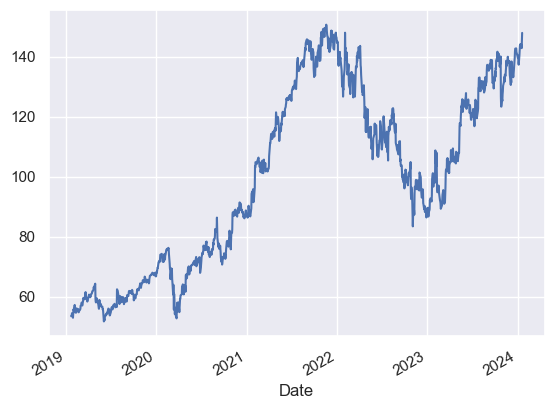

In [91]:
seaborn.set()
goog.plot()

### Resampling and converting frequencies

* resample() is a data aggregation
* asfreq() is a data selection

* resample takes the average per business year end
* asfreq takes the data point at business year end

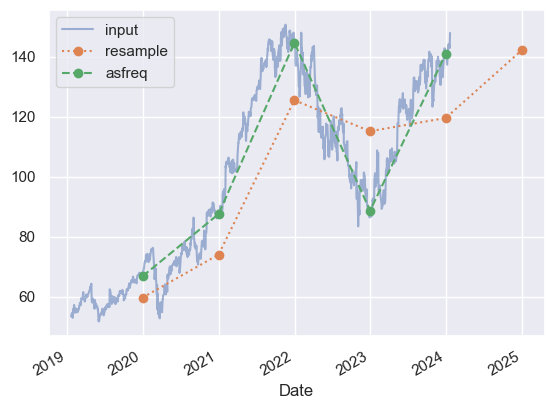

In [101]:
# BYE = business year end

goog.plot(alpha=0.5, style='-')
goog.resample('BYE').mean().plot(style='o:')
goog.asfreq('BYE').plot(style='o--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

In [97]:
goog.resample('BYE').mean()

Date
2019-12-31     59.749918
2020-12-31     74.070191
2021-12-31    125.530687
2022-12-30    115.193719
2023-12-29    119.611860
2024-12-31    142.313846
Freq: BYE-DEC, Name: Close, dtype: float64

In [102]:
goog.asfreq('BYE')

Date
2019-12-31     66.850998
2020-12-31     87.594002
2021-12-31    144.679504
2022-12-30     88.730003
2023-12-29    140.929993
Freq: BYE-DEC, Name: Close, dtype: float64

In [103]:
goog['2019']

Date
2019-01-22    53.526001
2019-01-23    53.778500
2019-01-24    53.695000
2019-01-25    54.549500
2019-01-28    53.504002
                ...    
2019-12-24    67.178001
2019-12-26    68.019997
2019-12-27    67.594498
2019-12-30    66.806999
2019-12-31    66.850998
Name: Close, Length: 239, dtype: float64

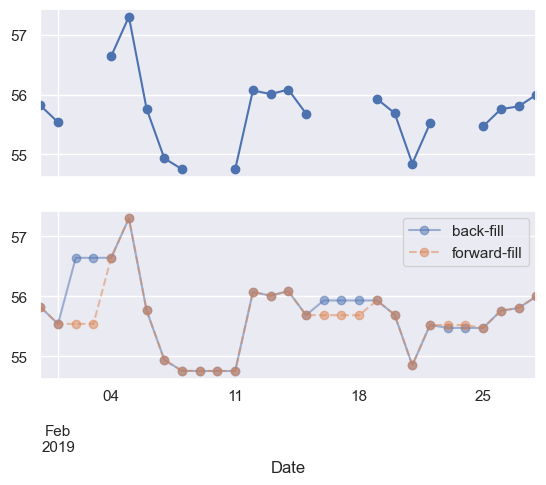

In [111]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[7:27]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(alpha=0.5, ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(alpha=0.5, ax=ax[1], style='--o')
ax[1].legend(['back-fill', 'forward-fill'])

### Time shifts
* shift() - shifts the data

<Axes: xlabel='Date'>

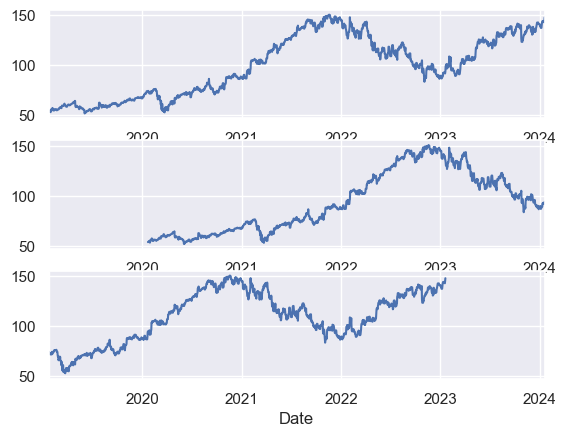

In [134]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(365).plot(ax=ax[1])
goog.shift(-365).plot(ax=ax[2])

In [126]:
goog['2020-02-01']

71.711502

In [127]:
goog['2019-02-01']

55.537498

In [129]:
goog['2020-02-01'] / goog['2019-02-01']

1.291226731171793

In [138]:
# compute year over year increase (ROI)
(goog / goog.shift(365))['2020-02-01']

1.291226731171793